# Implementing Neural Network From the scratch

What we need ?

__Functions:__<br>
- Loss function
- weight initialization
- activation function
- Back propogation 
- gradient calculation 
- optimization function
- forward propogation 
- evaluation function


__Parameters__<br>
- Learning rate
- epochs
- steps
- layers


In [2]:
# importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from tqdm import tqdm

In [3]:
# loading dataset
dataset= load_breast_cancer( return_X_y=False, as_frame=True)
classes= dataset.target_names
features= dataset.data
target= dataset.target
x_train,x_test,y_train,y_test= train_test_split(features,target.values,test_size=0.3)
y_train=y_train.reshape((len(y_train),1))
y_test=y_test.reshape((len(y_test),1))
y_train.shape

(398, 1)

In [106]:
x_train= np.array(x_train)
x_test= np.array(x_test)
y_train= np.array(y_train)
y_test= np.array(y_test)
np.count_nonzero(y_train),len(y_train)

(242, 398)

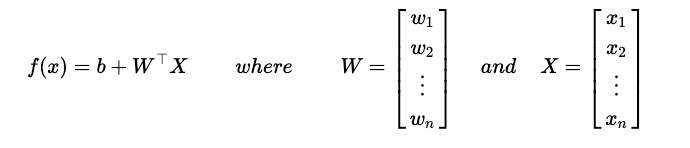
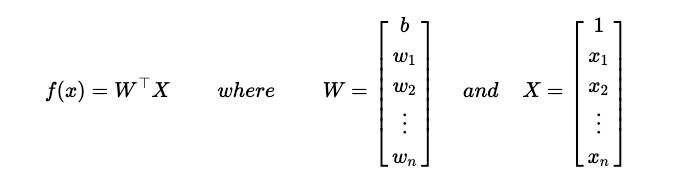
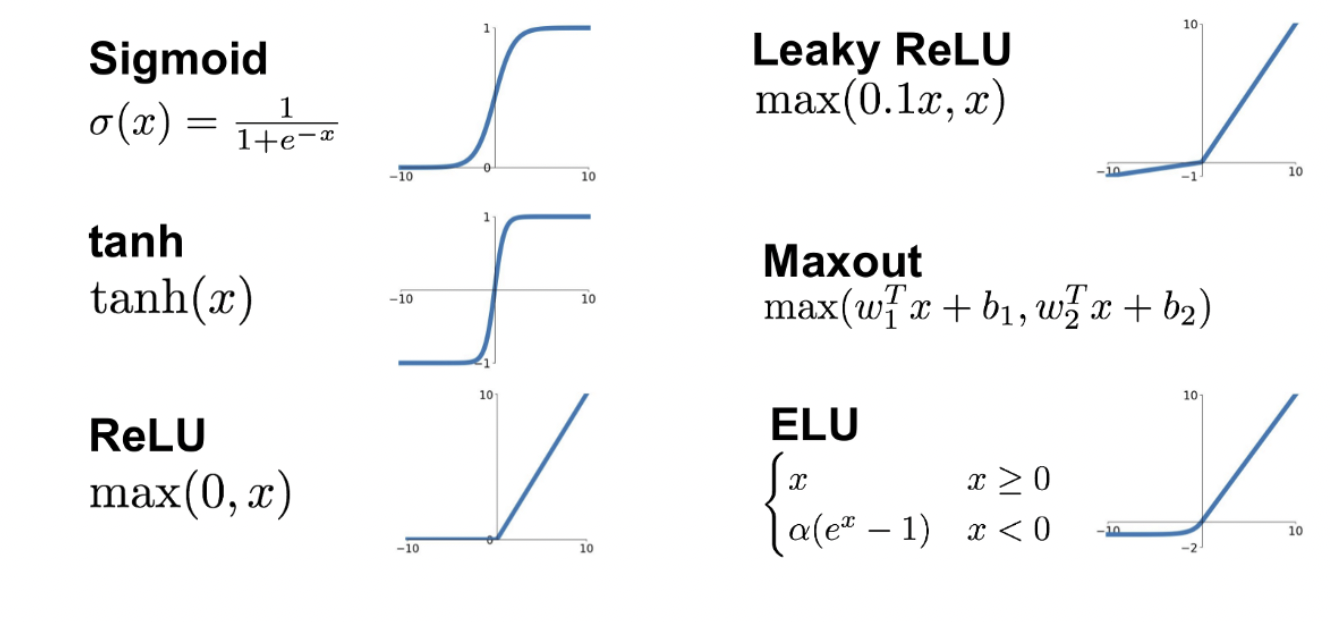
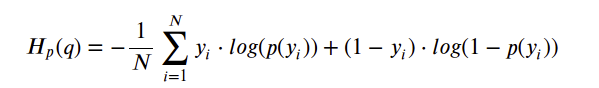

In [204]:
from sklearn.metrics import log_loss
from scipy.special import expit # to avoid the buffer overflow error 

class model():
    '''two layer neural network'''
    def __init__(self, layers=[30,8,1]):
        self.weight={}
        self.learning_rate= None
        self.epochs= None
        self.layers=layers
        self.loss=[]
        self.acc=[]
        self.x=None
        self.y= None
        self.batch_size=None
        self.iterations=None
        self.y_logit=None
       
    def init_weights(self):
        '''weight initialization'''
        self.weight['w1']= np.random.randn(self.layers[0],self.layers[1])# input layers , output layers
        self.weight['b1']= np.random.randn( 1,self.layers[1])
        self.weight['w2']= np.random.randn(self.layers[1],self.layers[2])
        self.weight['b2']= np.random.randn(1,self.layers[2])
        
    def sigmoid(self,x):
        # sigmoid for now 
        return  expit(x) #1/(1+np.exp(-x))
    
    def deri_sigmoid(self,x):
        return sigmoid(x)*(1-sigmoid(x))
    
    def avoidNan(self,y):
        '''to avoid null values'''
        temp=0.0000000001
        return np.where(y<temp, temp, y) 
    
    def binaryCrossEntropy(self):
        '''calculating loss between true label and logit
        right now using binary cross entropy loss'''
        n= len(self.y)
        y_t_sub= self.avoidNan(1-self.y)
        y_l_sub= self.avoidNan(1-self.y_logit)
        loss= log_loss(self.y,self.y_logit)
#         loss= np.square(self.y-self.y_logit)
      
        return loss
       
    
    def forward(self):
        '''forward propogation'''
#         print(self.x.shape, self.weight['b1'].shape)
        z1= self.x.dot(self.weight['w1'])+self.weight['b1']
        z2= z1.dot(self.weight['w2'])+self.weight['b2']
        self.y_logit= self.sigmoid(z2)
        loss= self.binaryCrossEntropy()
        #saving for future purpose
        self.weight['z1']=z1
        self.weight['z2']=z2
        self.weight['y_logit']=self.y_logit
        return loss
        
        
    def backpropogation(self,loss):
        y_logit_inv= self.avoidNan(1-self.y_logit)
        y_inv= self.avoidNan(1-self.y)
        
        dl_wrt_ylogit= np.divide(y_inv, self.avoidNan(y_logit_inv)) - np.divide(self.y, self.avoidNan(self.y_logit))
#         dl_wrt_ylogit= self.y-self.y_logit
        
        dl_wrt_sig= self.y_logit*(y_logit_inv)
        dl_wrt_z2= dl_wrt_ylogit*dl_wrt_sig  
        dl_wrt_w2=  self.weight['z1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0,keepdims=True)
        
        dl_wrt_z1 = dl_wrt_z2 .dot(self.weight['w2'].T)
        dl_wrt_w1 = self.x.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1,axis=0,keepdims=True)
        

        # updating weights
        self.weight['w1']+= self.learning_rate* dl_wrt_w1
        self.weight['w2']+= self.learning_rate* dl_wrt_w2
        self.weight['b1']+= self.learning_rate* dl_wrt_b1
        self.weight['b2']+= self.learning_rate* dl_wrt_b2
        
    def fit(self,x,y, iterations,learning_rate):
        '''training the data'''
        self.init_weights()
        self.x=x
        self.y=y
        self.iterations= iterations
        self.learning_rate= learning_rate
        for i in tqdm(range(self.iterations)):
#             print(i)
            loss=self.forward() 
            self.backpropogation(loss)  
            self.loss.append(loss)
            self.acc.append(self.accuracy())
        return self.loss, self.acc
    
    def accuracy(self):
        acc= int(sum(self.y==self.y_logit)/len(self.y) *100)
#         print('accuracy:',acc)
        return acc
    
    def predict(self,X):
        z1=X.dot(self.weight['w1'])+self.weight['b1']
        z2=z1.dot(self.weight['w2'])+self.weight['b2']
        Y_logit= self.sigmoid(z2)
        return Y_logit
    
    def plot_loss(self):
        plt.plot(self.loss)
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Loss curve for training')
        plt.show()
        
        

In [206]:
model1=model()
print(model1.fit(x_train,y_train,iterations=10,learning_rate=0.001))